In [1]:
import pandas as pd
import numpy as np
import string
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')

In [2]:
df = pd.read_csv('data/data.csv', encoding='latin-1')
df = df[['Prod_Budget', 'Runtime', 'Total_Torrents']]
print(len(df))
print(df.head())

1664
   Prod_Budget  Runtime  Total_Torrents
0  425000000.0      162          1450.0
1  300000000.0      148           647.0
2  275000000.0      164           861.0
3  275000000.0      132           723.0
4  260000000.0      100           563.0


In [3]:
df['Runtime'].describe()

count    1664.000000
mean      110.026442
std        18.226754
min        72.000000
25%        97.000000
50%       107.000000
75%       119.000000
max       229.000000
Name: Runtime, dtype: float64

In [4]:
buckets = [0, 80, 100, 120, 140, 160, 180, 200, 300]
labels = ['0-80', '80-100', '100-120', '120-140', '140-160', '160-180', '180-200', '200+']

df['Runtime_Bin'] = pd.cut(df['Runtime'], buckets, labels=labels)
df = df.sort_values(['Runtime'], ascending=True)

print(df['Runtime_Bin'].value_counts())

100-120    716
80-100     545
120-140    309
140-160     58
160-180     18
180-200      8
0-80         7
200+         3
Name: Runtime_Bin, dtype: int64


In [5]:
# dictionary - runtime bucket counts
duration = df['Runtime_Bin'].value_counts().to_dict()

import operator
srt = sorted(duration.items(), key=operator.itemgetter(1))
srt = srt[::-1]
print(srt)

[('100-120', 716), ('80-100', 545), ('120-140', 309), ('140-160', 58), ('160-180', 18), ('180-200', 8), ('0-80', 7), ('200+', 3)]


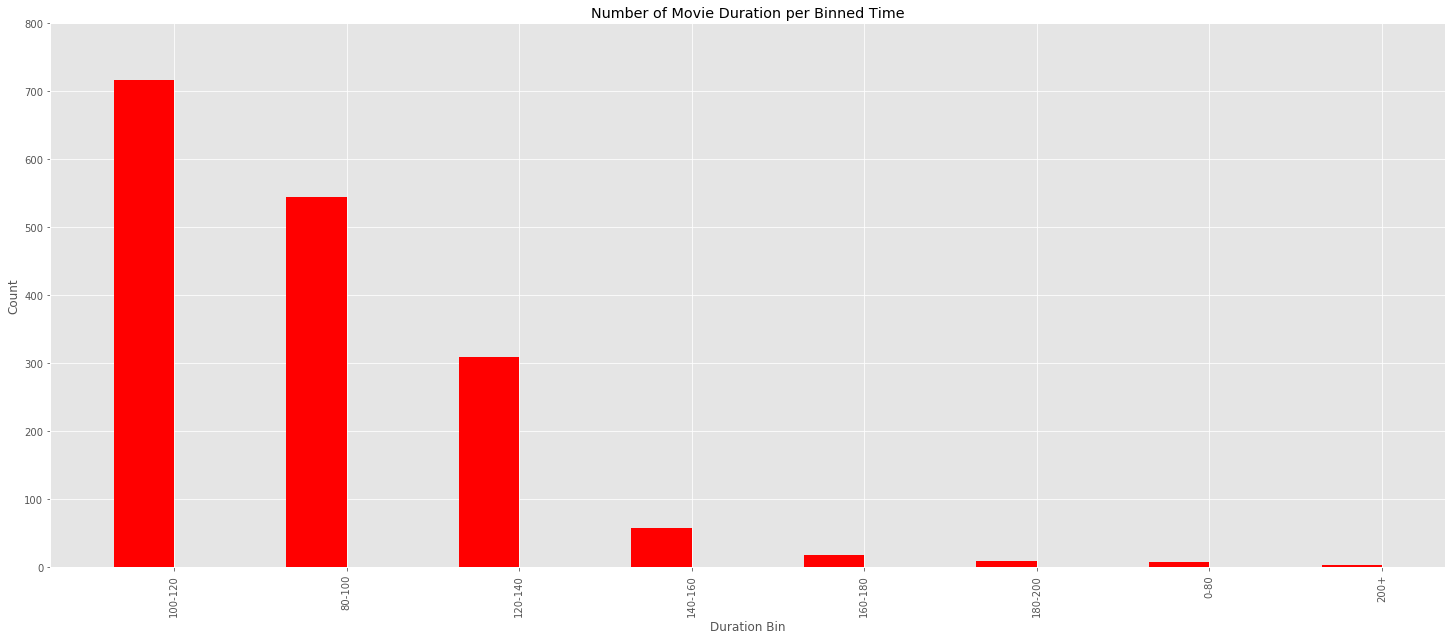

In [6]:
plt.figure(figsize=(25,10))

ind = np.arange(len(duration)) # the x locations for the groups
width = 0.35 # the width of the bars

bar_bin = [n_bin for n_bin, count in srt]
bar_count = [count for n_bin, count in srt]

plt.bar(ind, bar_count, width, color='r')

plt.ylabel('Count')
plt.xlabel('Duration Bin')
plt.title('Number of Movie Duration per Binned Time')
plt.xticks(ind + width/2., (bar_bin), rotation='vertical')
plt.yticks(np.arange(0, 801, 100))

plt.show()

716


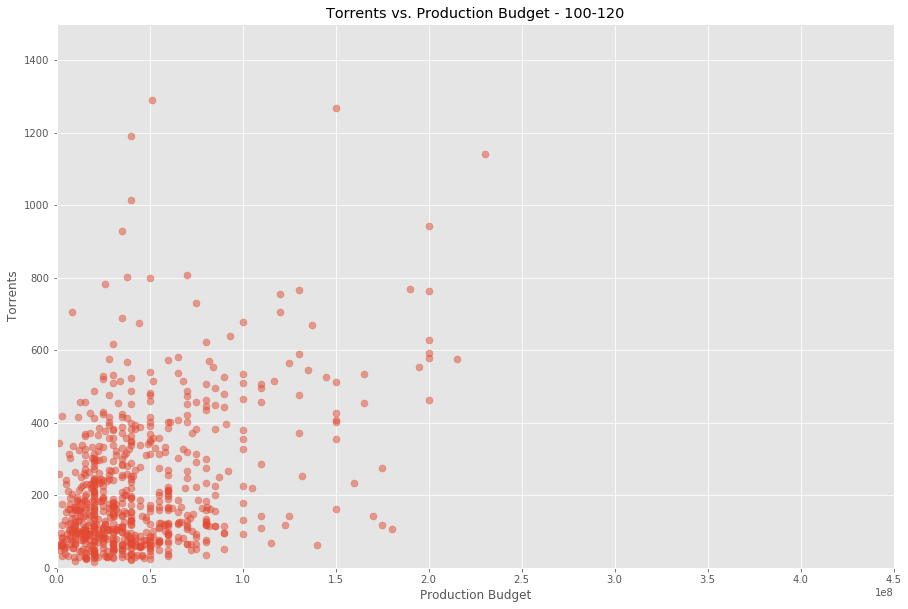

In [7]:
term = '100-120'
df_a = df.loc[df['Runtime_Bin'] == term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
_ = plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

545


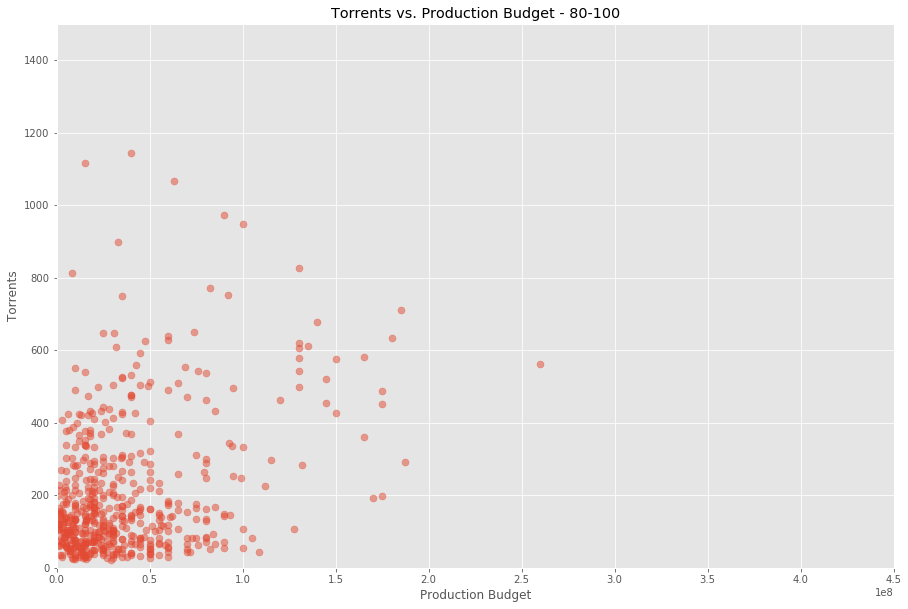

In [8]:
term = '80-100'
df_a = df.loc[df['Runtime_Bin'] == term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
_ = plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

309


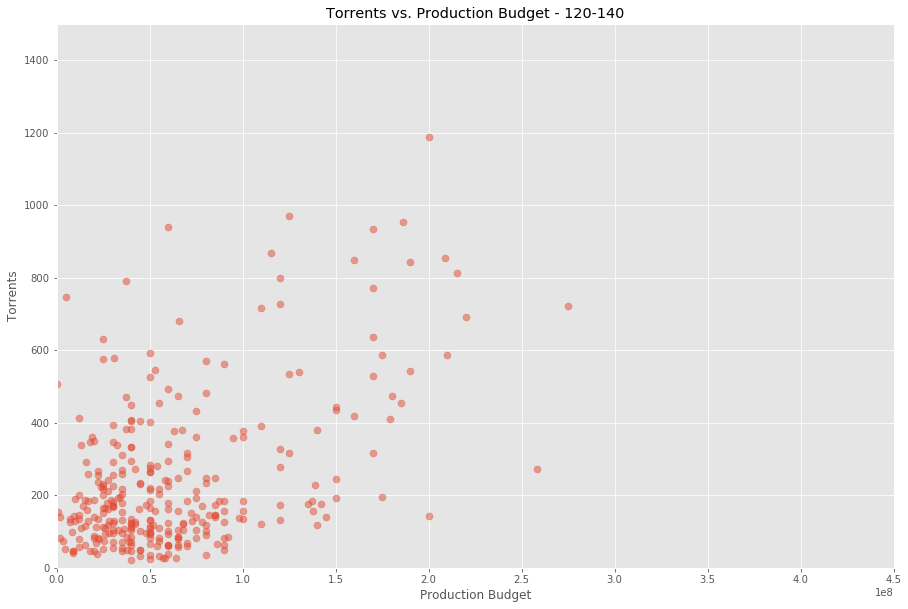

In [9]:
term = '120-140'
df_a = df.loc[df['Runtime_Bin'] == term]
print(len(df_a))

plt.figure(figsize=(15,10))
plt.axis([0, 450000000, 0, 1500])
plt.xlabel('Production Budget')
plt.ylabel('Torrents')
plt.title('Torrents vs. Production Budget - {0}'.format(term))
_ = plt.scatter(df_a['Prod_Budget'], df_a['Total_Torrents'], alpha=0.5, s=50)

In [10]:
df_sub = df[['Prod_Budget', 'Runtime', 'Runtime_Bin', 'Total_Torrents']]
df_sub.describe()

,Prod_Budget,Runtime,Total_Torrents
count,1.664000e+03,1664.000000,1664.000000
mean,4.773100e+07,110.026442,223.215745
std,4.429420e+07,18.226754,196.328069
min,6.800000e+04,72.000000,17.000000
25%,1.850000e+07,97.000000,89.000000
50%,3.500000e+07,107.000000,158.000000
75%,6.000000e+07,119.000000,298.000000
max,4.250000e+08,229.000000,1450.000000


/Users/bryant/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  app.launch_new_instance()


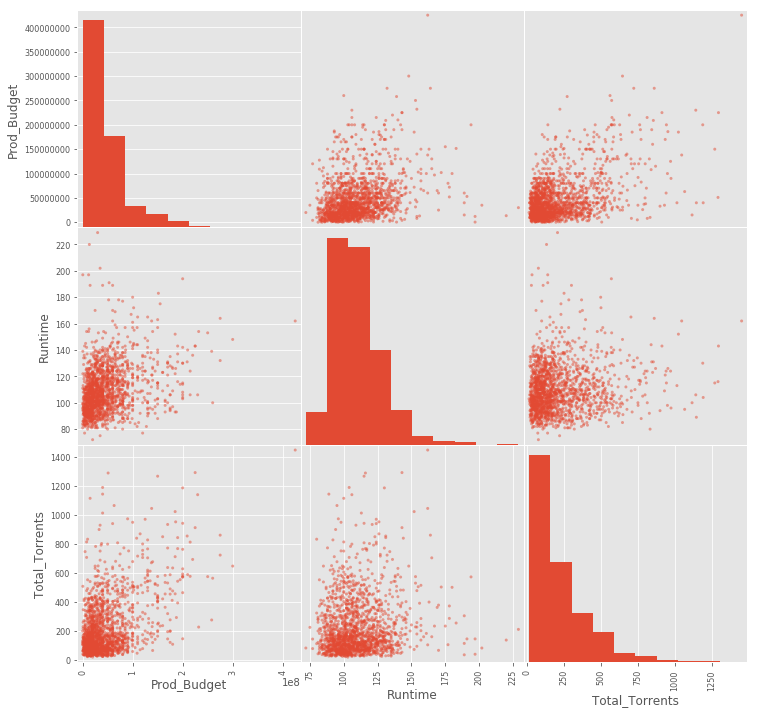

In [11]:
# Lets take a look at our entire model
plt.rcParams['figure.figsize'] = (12, 12)
_ = pd.tools.plotting.scatter_matrix(df_sub)

In [12]:
# select only runtime bins of significance
duration = ['80-100', '100-120', '120-140']
df_sub = df_sub.loc[df_sub['Runtime_Bin'].isin(duration)]
df_sub.describe()

,Prod_Budget,Runtime,Total_Torrents
count,1.570000e+03,1570.000000,1570.000000
mean,4.529649e+07,107.492994,217.320382
std,4.070365e+07,13.846661,189.354042
min,6.800000e+04,81.000000,17.000000
25%,1.800000e+07,97.000000,85.250000
50%,3.500000e+07,106.000000,153.000000
75%,6.000000e+07,117.000000,291.000000
max,2.750000e+08,140.000000,1291.000000


In [13]:
from patsy import dmatrices

y, x = dmatrices('Total_Torrents ~ Prod_Budget + Runtime_Bin', data=df_sub, return_type='dataframe')

In [14]:
y.head()

,Total_Torrents
1662,198.0
1265,40.0
961,281.0
375,258.0
1071,276.0


In [15]:
x.head()

,Intercept,Runtime_Bin[T.80-100],Runtime_Bin[T.100-120],Runtime_Bin[T.120-140],Runtime_Bin[T.140-160],Runtime_Bin[T.160-180],Runtime_Bin[T.180-200],Runtime_Bin[T.200+],Prod_Budget
1662,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,100000.0
1265,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,18000000.0
961,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,30000000.0
375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,65000000.0
1071,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,25000000.0


In [16]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
results.summary()

/Users/bryant/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/bryant/anaconda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1471: RuntimeWarning: divide by zero encountered in double_scalars
  return np.sqrt(eigvals[0]/eigvals[-1])
/Users/bryant/anaconda/lib/python3.6/site-packages/statsmodels/base/model.py:1036: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/Users/bryant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/bryant/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     114.9
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           3.12e-67
Time:                        15:23:53   Log-Likelihood:                -10304.
No. Observations:                1570   AIC:                         2.062e+04
Df Residuals:                    1566   BIC:                         2.064e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 93.1120      5.239     17.774      0.000      82.836     103.388
Runtime_Bin[T.80-100]     38.2716      6.238      6.135      0.000      26.035      50.508
Runtime_Bin[T.100-120]    35.3639      5.770      6.129      0.000      24.047      46.681
Runtime_Bin[T.120-140]    19.4765      8.276      2.353      0.019       3.244      35.709
Runtime_Bin[T.140-160]          0          0        nan        nan           0           0
Runtime_Bin[T.160-180]          0          0        nan        nan           0           0
Runtime_Bin[T.180-200]          0          0        nan        nan           0           0
Runtime_Bin[T.200+]             0          0        nan        nan           0           0
Prod_Budget             2.008e-06    1.1e-07     18.338      0.000    1.79e-06    2.22e-06
==============================================================================
Omnibus:                      534.136   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2052.114
Skew:                           1.625   Prob(JB):                         0.00
Kurtosis:                       7.561   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [17]:
import statsmodels.formula.api as smf

results = smf.ols(formula='Total_Torrents ~ Prod_Budget + Runtime', data=df_sub,).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Total_Torrents   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     172.3
Date:                Sun, 13 Aug 2017   Prob (F-statistic):           2.39e-68
Time:                        15:23:53   Log-Likelihood:                -10304.
No. Observations:                1570   AIC:                         2.061e+04
Df Residuals:                    1567   BIC:                         2.063e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     177.4143     34.088      5.205      0.000     110.551     244.277
Prod_Budget  2.009e-06    1.1e-07     18.294      0.000    1.79e-06    2.22e-06
Runtime        -0.4751      0.323     -1.472      0.141      -1.108       0.158
==============================================================================
Omnibus:                      535.759   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2068.568
Skew:                           1.629   Prob(JB):                         0.00
Kurtosis:                       7.583   Cond. No.                     4.79e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.79e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
model.score(x, y)

0.18036536773284317

In [20]:
model.coef_

array([[  0.00000000e+00,   7.23428364e+00,   4.32658345e+00,
         -1.15608671e+01,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   2.00814630e-06]])

/Users/bryant/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:5: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.


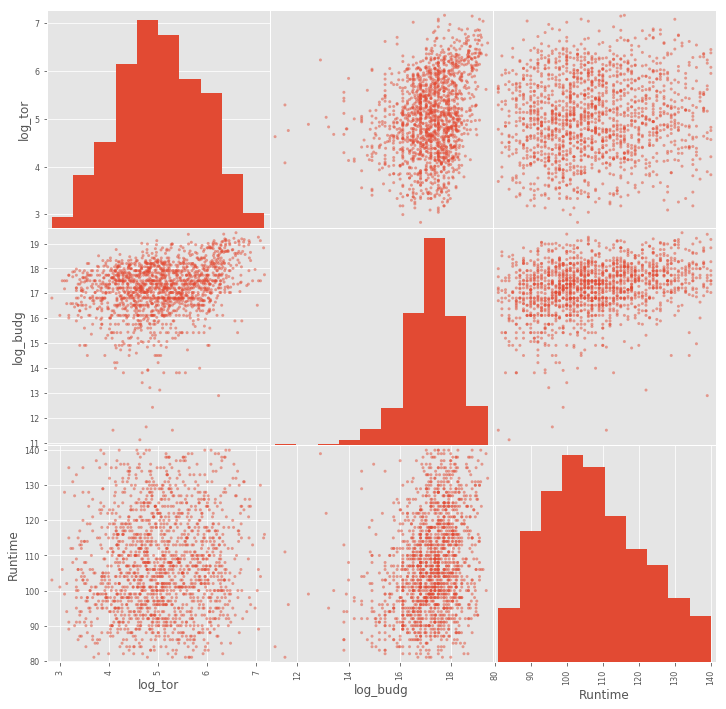

In [21]:
df_sub['log_tor']=np.log(df_sub.Total_Torrents)
df_sub['log_budg']=np.log(df_sub.Prod_Budget)

trans=df_sub[['log_tor','log_budg', 'Runtime']]
_ = pd.tools.plotting.scatter_matrix(trans)

---
# Log Transform

In [22]:
y, x = dmatrices('log_tor ~ log_budg + Runtime_Bin', data=df_sub, return_type='dataframe')
x.head()

,Intercept,Runtime_Bin[T.80-100],Runtime_Bin[T.100-120],Runtime_Bin[T.120-140],Runtime_Bin[T.140-160],Runtime_Bin[T.160-180],Runtime_Bin[T.180-200],Runtime_Bin[T.200+],log_budg
1662,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,11.512925
1265,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,16.705882
961,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.216708
375,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.989898
1071,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,17.034386


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x, y)

model.score(x,y)

0.073126521575192061

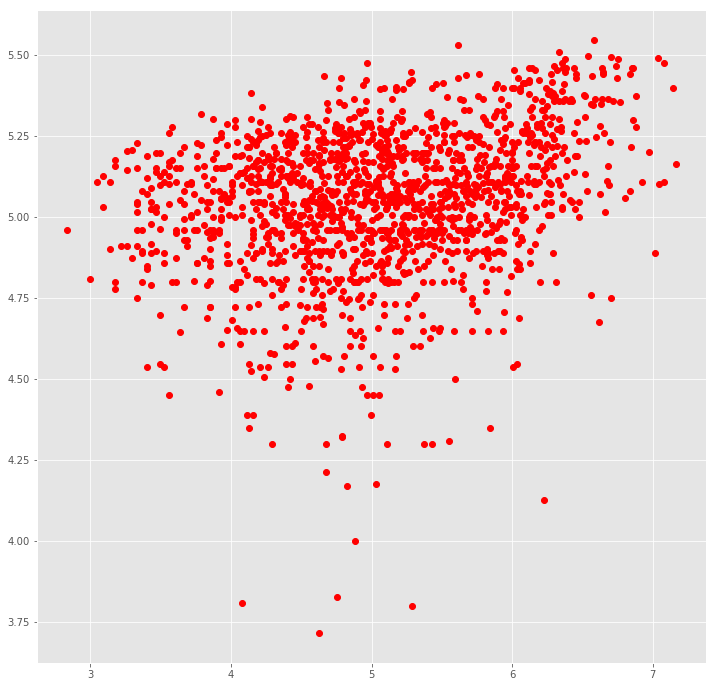

In [24]:
_ = plt.plot(y, model.predict(x), 'ro')

In [25]:
from sklearn import cross_validation as cv
from sklearn import metrics

x_train, x_test, y_train, y_test = cv.train_test_split(x,y,test_size=0.333,random_state=1234)

model = LinearRegression().fit(x_train, y_train)

/Users/bryant/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
metrics.mean_squared_error(y_train,model.predict(x_train))

0.6256504211661591

In [27]:
model.score(x_train, y_train)

0.080732417488071695

In [28]:
metrics.mean_squared_error(y_test,model.predict(x_test))

0.67129015118529678

In [29]:
# reset x, y otherwise errors occur
y, x = dmatrices('log_tor ~ log_budg + Runtime_Bin', data=df_sub, return_type='dataframe')

from sklearn.cross_validation import KFold
kf = KFold(len(df_sub), n_folds=100, shuffle=True)

for train_index, test_index in kf:
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    clf2 = LinearRegression().fit(x.iloc[train_index], y.iloc[train_index])

clf2.score(x,y)

0.072317789136014943